# Headlist TFS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

anos = 4
arquivos = ['csv\\TFS 2017 pas.csv', 'csv\\TFS 2016 pas.csv', 'csv\\TFS 2015 pas.csv', 'csv\\TFS 2014 pas.csv']
arquivodfm = 'csv\\TFS 2017 dfm.csv'

In [2]:
def tratar(ano, quant, dfm):
    if dfm:
        dfHeadlist = pd.read_csv(arquivodfm, encoding='ISO-8859-1', delimiter=',')
    else:
        dfHeadlist = pd.read_csv(arquivos[ano], encoding='ISO-8859-1', delimiter=',')
    #dfHeadlist = dfHeadlist.drop('cfi', axis=1)
    dfHeadlist = dfHeadlist.query('quantum > ' + str(quant))
    dfHeadlist = dfHeadlist.assign(file=dfHeadlist['itemName'].str.split("/"))
    #dfHeadlist['file'] = dfHeadlist['file'][-1]
    #dfHeadlist['file'][0][-1]
    files = []
    for row in dfHeadlist['itemName']:
        files.append(row.split('/')[-1])
    dfHeadlist['file'] = files
    dfHeadlist = dfHeadlist.drop('itemName', axis=1).drop('cfi', axis=1)
    if not dfm:
        print (arquivos[ano])
    return dfHeadlist

In [5]:
nome = ['2017', '2016', '2015', '2014']

def grafico_checkins(ano, df):
    plLinhas = df.drop('size', axis=1).set_index('file')
    plLinhas[:10].plot(kind='barh')
    plt.title("Checkins " + nome[ano] + " por Unit")
    plt.show()

In [7]:
def grafico_tamanho(df):
    plLinhas = df.drop('quantum', axis=1).sort_values(by='size').set_index('file').plot(kind='barh')
    plt.title("Tamanho da Unit")
    plt.show()

csv\TFS 2017 pas.csv


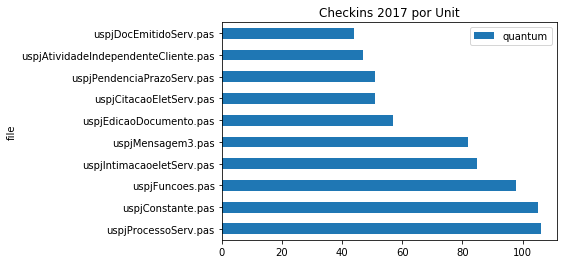

csv\TFS 2016 pas.csv


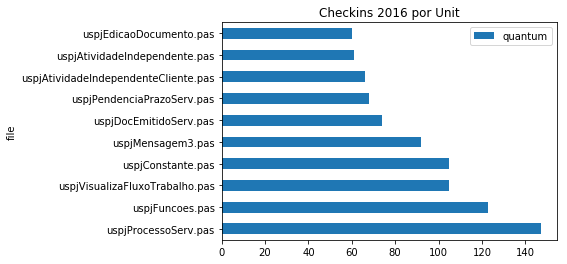

csv\TFS 2015 pas.csv


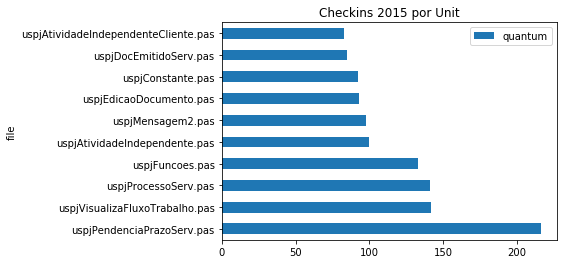

csv\TFS 2014 pas.csv


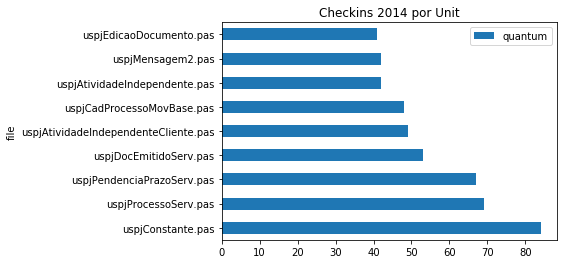

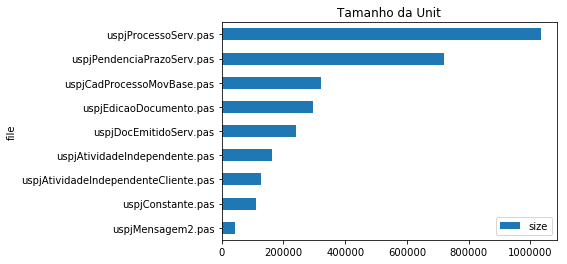

In [8]:
for ano in range(anos):
    dfHeadlistPas = tratar(ano, 40, False)
    grafico_checkins(ano, dfHeadlistPas)
grafico_tamanho(dfHeadlistPas)
    #dfHeadlistPas

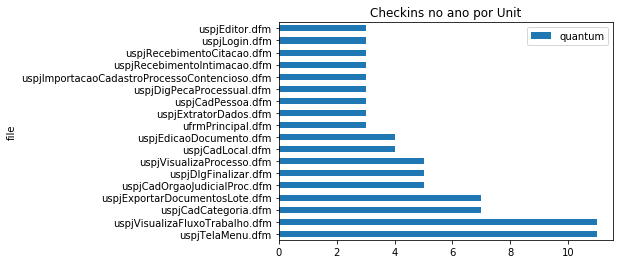

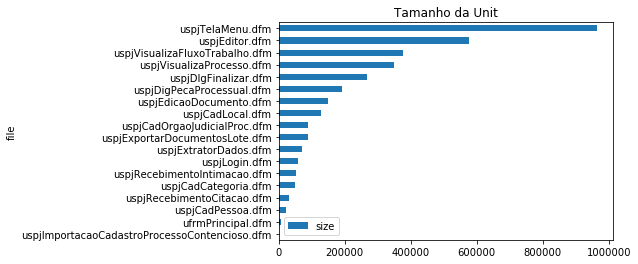

In [6]:
dfHeadlistDfm = tratar(ano, 2, True)
grafico_checkins(dfHeadlistDfm)
grafico_tamanho(dfHeadlistDfm)

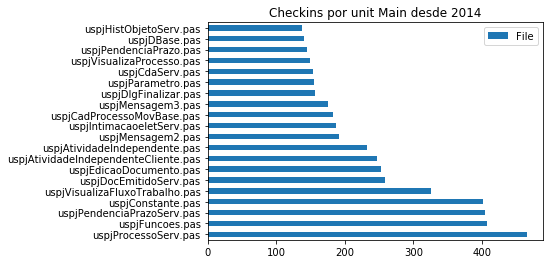

In [9]:
main = 'csv\main_changeset.csv' #desde 2014

dfChangesets = pd.read_csv(main, encoding='ISO-8859-1', delimiter=';', header=None, 
                 names= ["Salt", "Changeset", "Desenv", "Data", "Descricao", "File", "Filename"])

#df.groupby('File').count()
#Files = df.File.value_counts()
Files = dfChangesets.File.value_counts().to_frame() #index #.tolist()
Files = Files.filter(like='.pas', axis=0)

Files[:20].plot(kind='barh')
plt.title("Checkins por unit Main desde 2014")
plt.show()

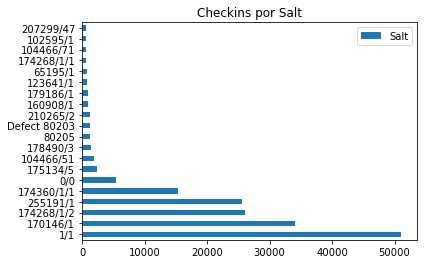

In [26]:
Salts = dfChangesets.Salt.value_counts().to_frame() #index #.tolist()
#Files[:20].plot(kind='barh')
#Files = Files.filter(like='.pas', axis=0)

Salts[:20].plot(kind='barh')
plt.title("Checkins por Salt")
plt.show()

In [29]:
Salts = dfChangesets.Salt.value_counts()#.to_frame()
Salts = Salts.loc[Salts>500]
Salts = Salts.to_frame().reset_index()
#Salts = Salts.drop('Salt', axis=1)
Salts = Salts.set_index("index")
Salts

,Salt
index,
1/1,51035
170146/1,34126
174268/1/2,26133
255191/1,25508
174360/1/1,15258
0/0,5464
175134/5,2434
104466/51,1855
178490/3,1368


In [30]:
dfChangesets.groupby('Salt')['Salt'].count()

Salt
'146324/12                 12
0                         125
0/0                      5464
00001/1                     6
1                           8
1-1                         1
1/1                     51035
101380                     97
102526/1                   13
102595/1                  559
102882/1                    1
102892/3                    1
103227                      2
104365/6                   69
104466/1                    4
104466/101                  2
104466/102                  1
104466/108                  2
104466/114                 22
104466/116                  1
104466/117                  1
104466/119                  8
104466/120                  2
104466/121                  1
104466/123                  8
104466/16                   7
104466/35                  36
104466/48                   2
104466/51                1855
104466/61                 542
                        ...  
Defect 98414                1
Defect 98535, 108282        5
Defec

In [32]:
correcao = dfChangesets
correcao[correcao.File == 'uspjEnvioEMail.pas']
#correcao[correcao.Salt == '260601/1']

,Salt,Changeset,Desenv,Data,Descricao,File,Filename
33129,170146/1,550418,olimar.santos,1/12/2017,Migração Tokyo,uspjEnvioEMail.pas,/fPJ/PJ/build/main/pjDev/src/pj/Cliente/uspjEn...
81654,255191/1,550076,ulder.junior,30/11/2017,Branched from $/fPJ/PJ/build/main/pjDev,uspjEnvioEMail.pas,/fPJ/PJ/build/main/features/121705/pjDev/src/p...
134251,1/1,543907,ulder.junior,23/10/2017,Branched from $/fPJ/PJ/build/main/pjDev,uspjEnvioEMail.pas,/fPJ/PJ/build/main/118432/pjDev/src/pj/Cliente...
147120,0,502151,robledo.fortuna,13/2/2017,Correção violação sonar,uspjEnvioEMail.pas,/fPJ/PJ/build/main/pjDev/src/pj/Cliente/uspjEn...
156350,191106/305,463911,fabio.schunig,29/7/2016,Merge da sprint - Envio de e-mail pelo PGE.Net,uspjEnvioEMail.pas,/fPJ/PJ/build/main/pjDev/src/pj/Cliente/uspjEn...
171161,183242/66,363736,marcelo.costa,1/7/2015,SALT 183242/66 - Melhoria na tela de envio de ...,uspjEnvioEMail.pas,/fPJ/PJ/build/main/pjDev/src/pj/Cliente/uspjEn...
172905,174268/1/2,338907,henrique.ramos,17/4/2015,SALT 174268/1/2 - Correção H/W,uspjEnvioEMail.pas,/fPJ/PJ/build/main/pjDev/src/pj/Cliente/uspjEn...
174405,151926/97,324959,juliano,5/3/2015,SALT 151926/97 - Merge final,uspjEnvioEMail.pas,/fPJ/PJ/build/main/pjDev/src/pj/Cliente/uspjEn...
